In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from peak_resolver.linear_combination_fitting import * 
import statsmodels.api as sms
import pickle 


In [2]:
def get_acid_root(root, acid):
    root +=  acid.upper() + ' ACID/'
    return root 
    
def get_ds_filepath(root, acid):
    fp = get_acid_root(root, acid)
    return fp + acid.capitalize() + '.nc'

def run_and_save_model(root,
                       acid, 
                       regressand='ds', 
                       basis_conc=0.5
                      ):
    ds_fp = get_ds_filepath(root, acid)
    ds = xr.load_dataset(ds_fp)
    root = get_acid_root(root,acid)
    
    
    ds = ds.interp(t=np.linspace(ds.coords['t'].values.min(), ds.coords['t'].values.max(), 1000))
    basis = ds.sel({acid:basis_conc}).dropna(dim='t', how='all')[regressand].values
    basis =(basis, np.zeros_like(basis))


    coeffs = []
    concs = ds.coords[acid].values
    for i in concs:
        print(i)
        
        data = ds.sel({acid:i}).dropna(dim='t', how='all')[regressand]
        data_v = data.values
    
        res = lin_combination_fitting(data_v, basis,
                                      bounds=[[-10,10],[0,0]], 
                                      
                                      method='Nelder-Mead')
    
        p = res['p']   
        coeffs.append(p[0])
        
        fit = calculate_fit(res['p'], basis)
        
        fig, ax = plt.subplots()
        
        t = data.coords['t']
        ax.plot(t, data, color = 'black', label='target function')
        # ax.plot(t, basis, color = 'gray', label='fitting function')
        ax.plot(t, fit, color='#b9d9e9', label='fit')
    
        offset = 2 * min(data)
        ax.fill_between(t, offset, data - fit + offset, label='residual', alpha=0.5, color='#b9d9e9')
        ax.text(0.02, 0.95, acid + ' ' + str(i) + ' mmol/L'.format(acid), transform=ax.transAxes, va = 'top', ha='left')
        ax.text(0.02, 0.9, 'Fitting function: ' + str(basis_conc) + ' mmol/L'.format(acid), transform=ax.transAxes, va = 'top', ha='left')
    
        ax.legend()
        plt.savefig(root + '/plots/conc_{}_basis_{}.png'.format(str(i),str(basis_conc)), bbox_inches='tight', dpi=300)

    X = coeffs
    X = sms.add_constant(X)
    y = concs
    mod = sms.OLS(y, X)
    res = mod.fit()
    coeffs = np.array(coeffs[:-1])

    fig, ax = plt.subplots()
    ax.plot(coeffs, concs[:-1], 'o')
    ax.plot(coeffs, res.params[0] + res.params[1] * coeffs, '-')
    ax.set_xlabel(r'Coefficients, $p$')
    ax.set_ylabel('Concentration [mmol/L]')
    ax.text(0.02, 0.95, r'$c = {:1.3f} p + {:1.3f}$'.format(res.params[1], res.params[0]), transform=ax.transAxes, va = 'top', ha='left')
    ax.set_xlim((-0.05, max(coeffs) + 0.1))
    ax.set_ylim((-0.05, max(concs) + 0.05))
    
    plt.savefig(root + '/plots/coeffs_vs_conc_basis_{}.png'.format(str(basis_conc)), bbox_inches='tight', dpi=300)

    object = res
    file_out = root + 'model/model.pkl'
    filehandler = open(file_out, 'wb') 
    pickle.dump(object, filehandler)

    plt.close()
    return

0.05


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.1


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.2


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.3


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.4


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.5


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.05


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.1


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.2


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.3


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.4


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.5


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.05


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.1


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.2


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.3


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.4


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.5


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.05


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.1


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.2


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)
/var/folders/v_/vtd2tmzj5x5f6n09mk_lt_yr0000gn/T/ipykernel_73313/3234780171.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.3


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.4


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.5


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.05


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.1


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.2


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.3


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.4


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


0.5


/Users/ianbillinge/dev/peak_resolver/peak_resolver/linear_combination_fitting.py:53: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(residuals, initial_guess, args=(target, vectors), bounds=bounds, method=method)


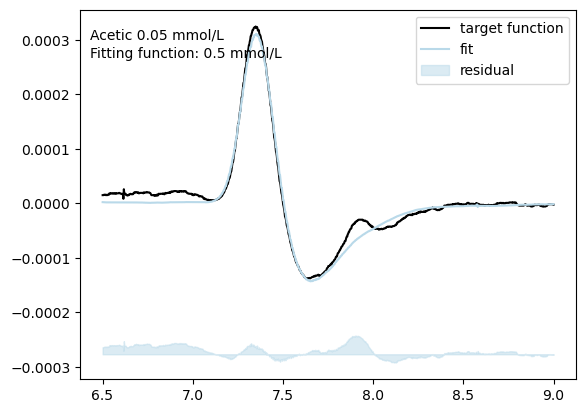

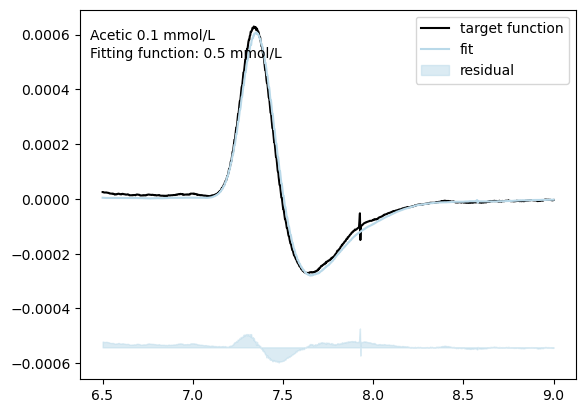

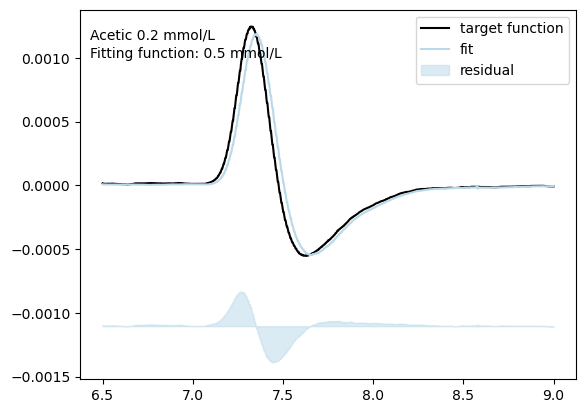

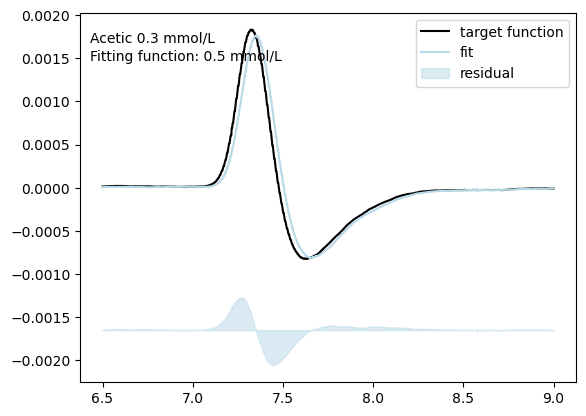

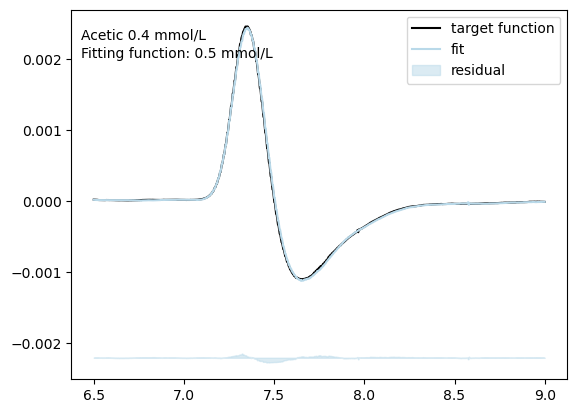

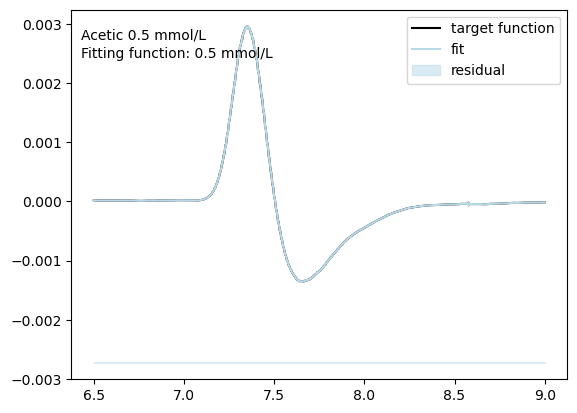

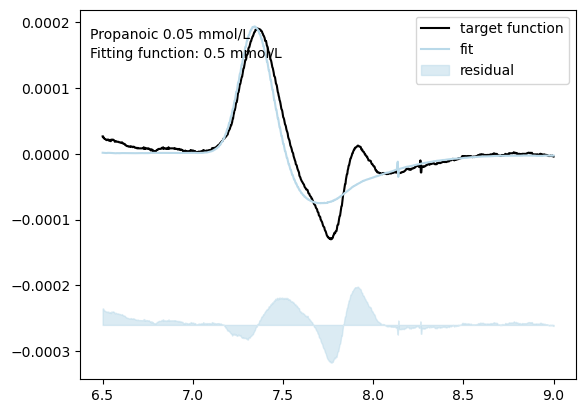

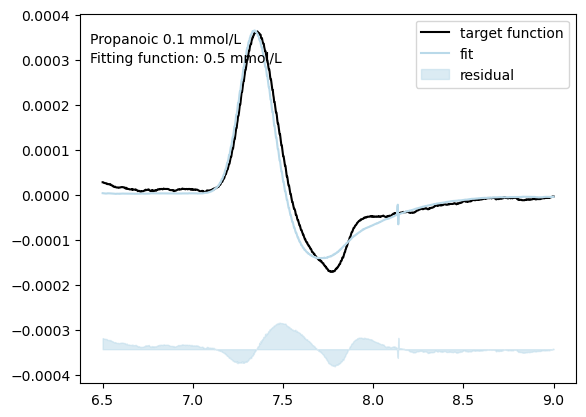

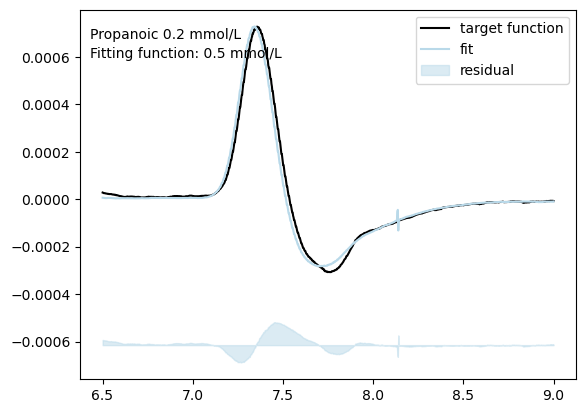

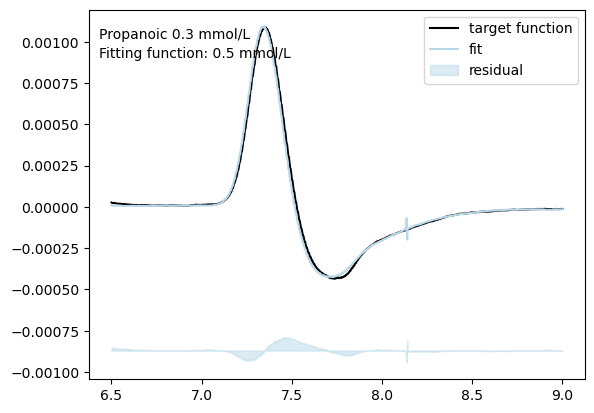

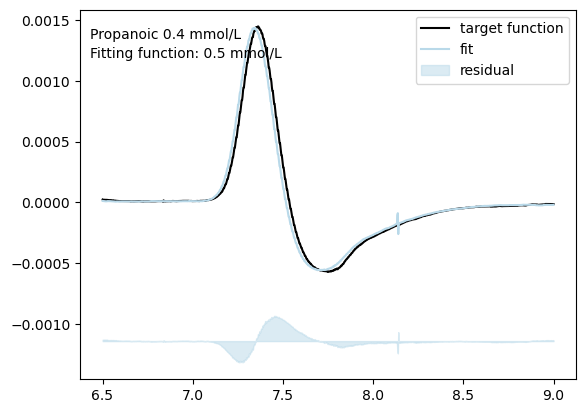

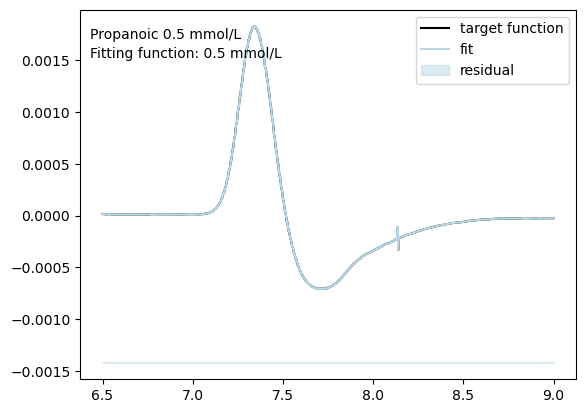

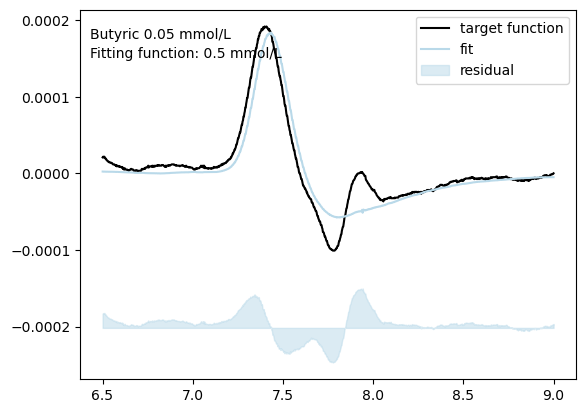

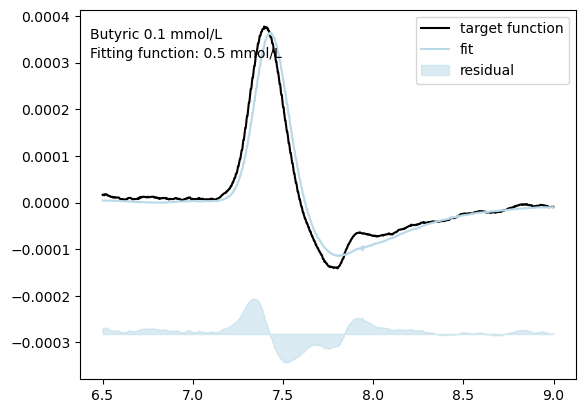

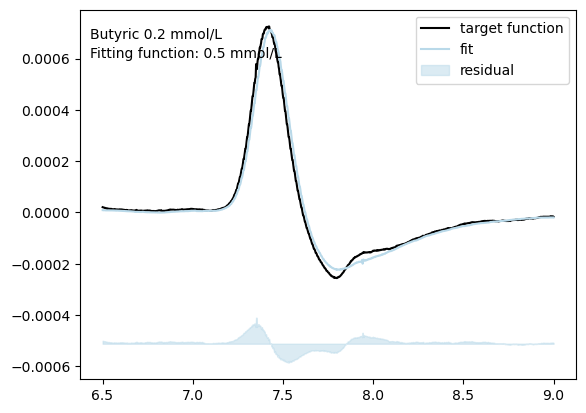

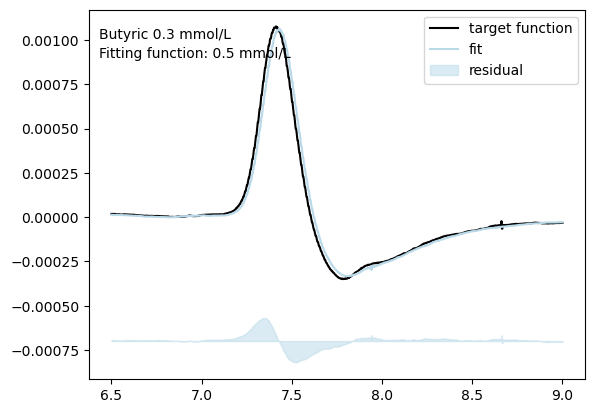

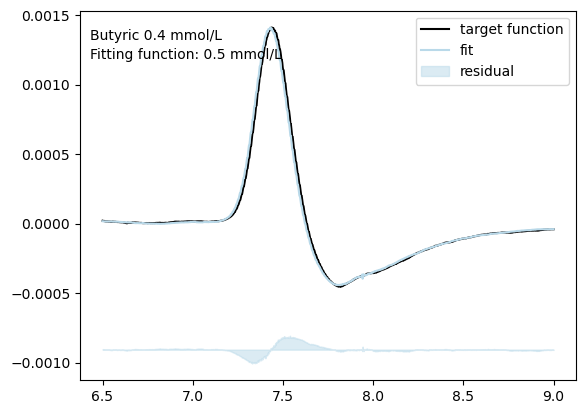

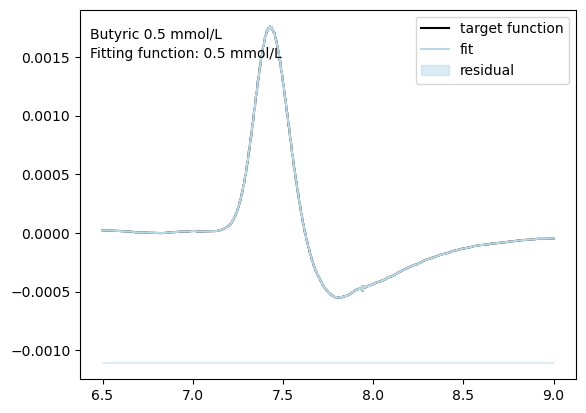

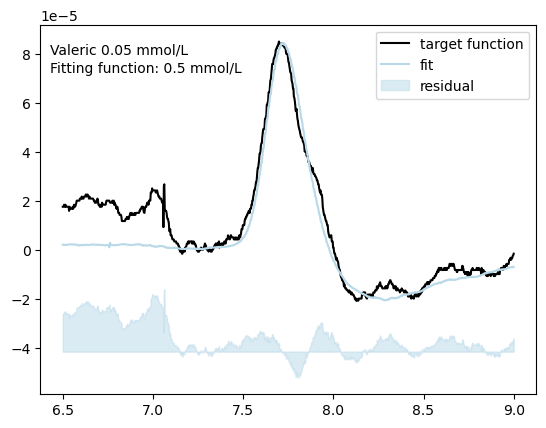

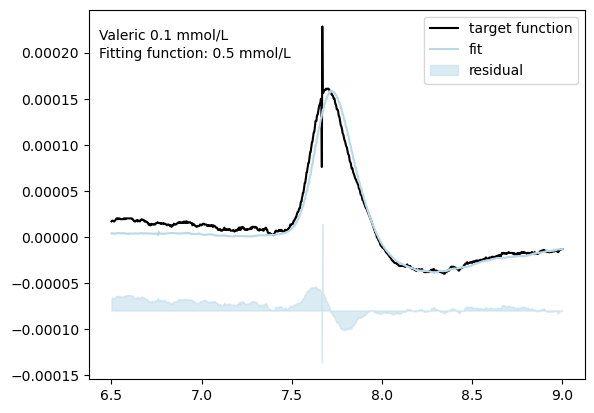

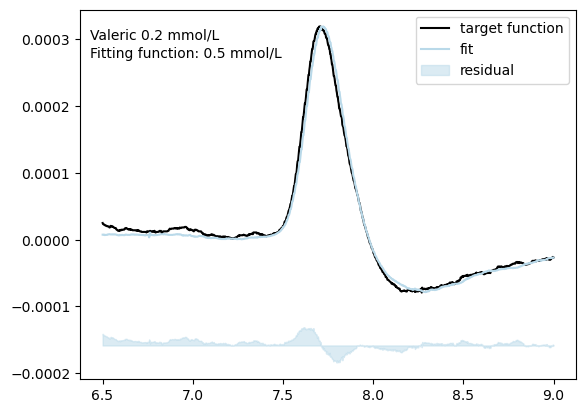

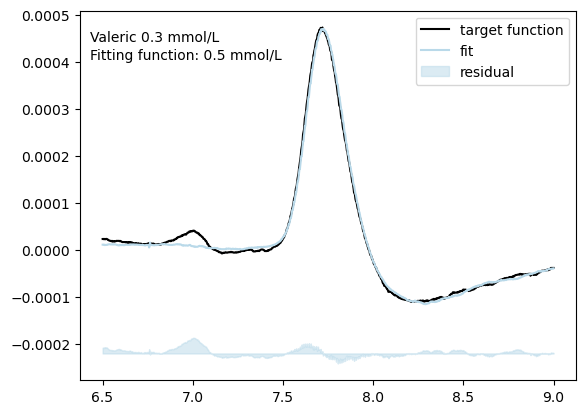

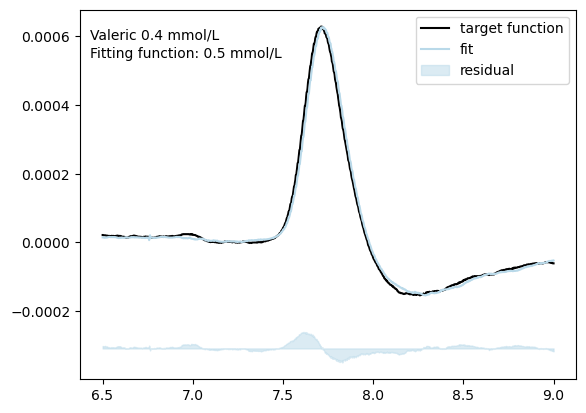

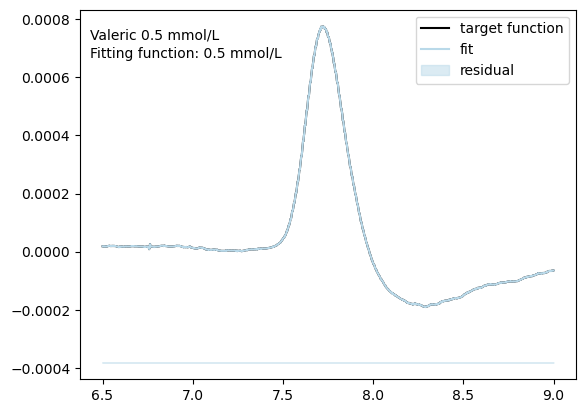

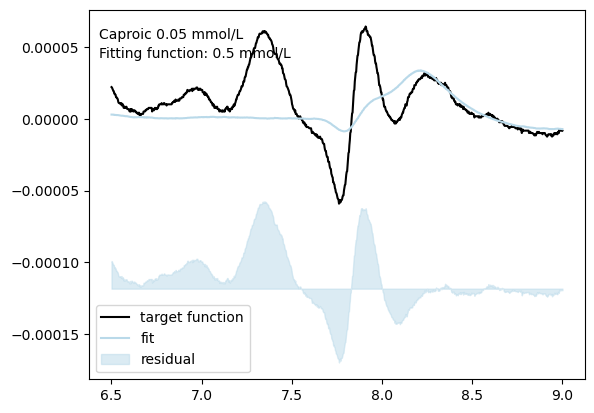

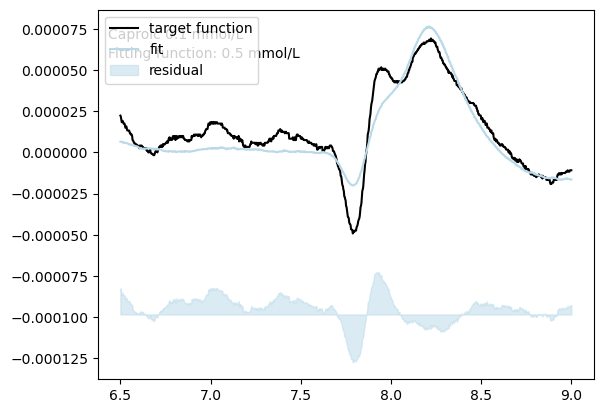

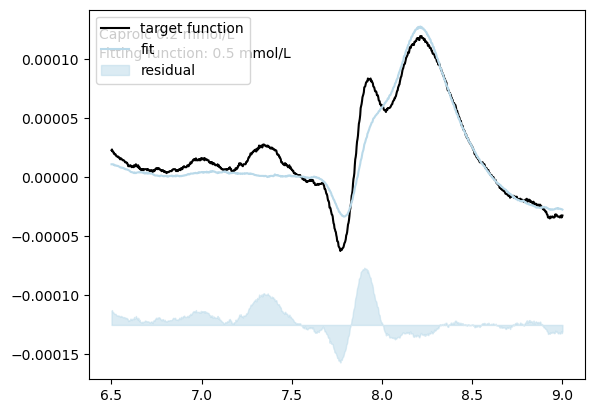

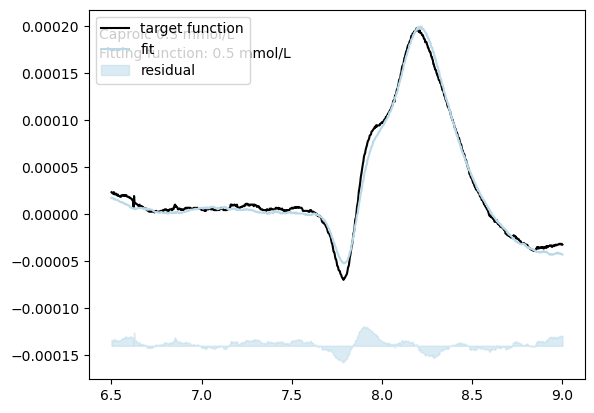

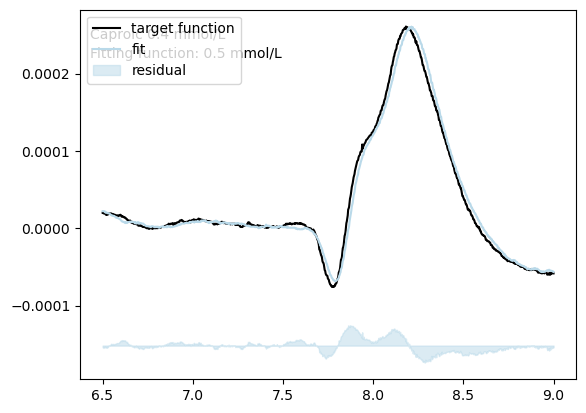

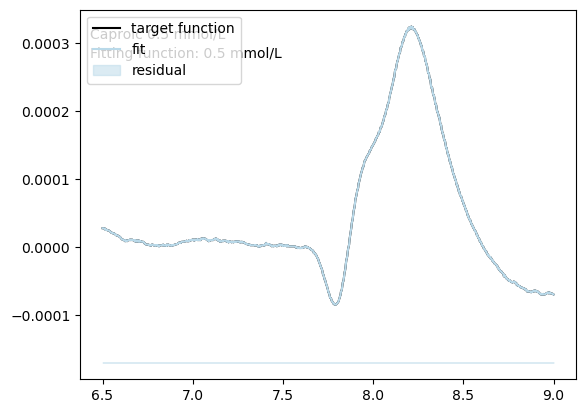

In [3]:
acids = ['Acetic', 'Propanoic', 'Butyric', 'Valeric', 'Caproic']

root = '/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/'
for acid in acids:
    run_and_save_model(root, acid)
